In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./gRNA efficiency.xlsx') # insert path for data

[]

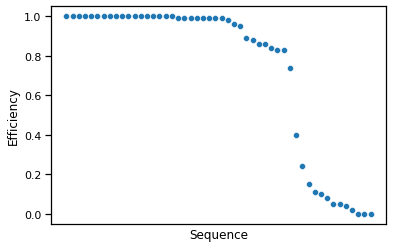

In [3]:
#Quick overview of the efficiency
sns.set_context('notebook')
g = sns.scatterplot(data = df, x = df.Sequence, y = 'Efficiency')
g.set_xticks([])

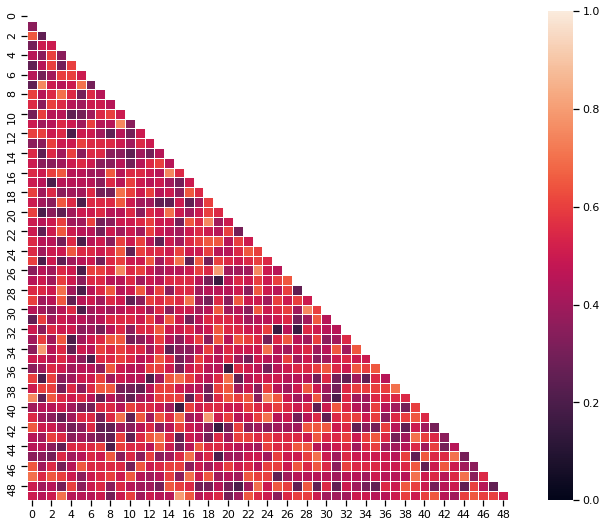

In [4]:
#Similarity between gRNA sequences
from difflib import SequenceMatcher
df_similarity = df.copy()
list_of_seq = list(df.Sequence)


for i in range(len(list_of_seq)):
    test = list_of_seq[i] # Sequence that will be evaluated for similarity
    df_similarity[i] = df_similarity.apply(lambda x: SequenceMatcher(None, test, x.Sequence).ratio(), axis=1)
    
df_similarity = df_similarity.iloc[:, 2: len(df_similarity.columns)]

#heatmap
mask = np.triu(np.ones_like(df_similarity))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_similarity, mask=mask,
            linewidths=.5, vmax = 1, vmin = 0)

plt.show()


In [5]:
#Correlation
from Bio.SeqUtils import GC

#GC content
df_correlation = df.copy()
df_correlation['GC content'] = None
for i in range(len(df_correlation.Sequence)):
    df_correlation['GC content'][i] = GC(df_correlation.Sequence[i])
df_correlation['GC content'] = df_correlation['GC content'].astype(float)

#Last base
df_correlation['last base'] = None
for i in range(len(df_correlation.Sequence)):
    df_correlation['last base'][i] = df_correlation.Sequence[i][-1]
    
#number of TT
df_correlation['number of TT'] = df_correlation['Sequence'].str.count('TT')

#Number of G
df_correlation['number of G'] = df_correlation['Sequence'].str.count('G')

#Tm from 16-20
from Bio.SeqUtils import MeltingTemp as mt
df_correlation['Tm 16to20'] = None
for i in range(len(df_correlation.Sequence)):
    a = df_correlation.Sequence[i][15:]
    df_correlation['Tm 16to20'][i]= '%0.2f' % mt.Tm_Wallace(a)

df_correlation['Tm 16to20'] = pd.to_numeric(df_correlation['Tm 16to20'])

#position_18
df_correlation['position 18'] = None
for i in range(len(df_correlation.Sequence)):
    df_correlation['position 18'][i] = df_correlation.Sequence[i][-3]

#position_16
df_correlation['position 16'] = None
for i in range(len(df_correlation.Sequence)):
    df_correlation['position 16'][i] = df_correlation.Sequence[i][-5]
    
#position_14
df_correlation['position 14'] = None
for i in range(len(df_correlation.Sequence)):
    df_correlation['position 14'][i] = df_correlation.Sequence[i][-7]


<ipython-input-5-c5907530ad58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation['GC content'][i] = GC(df_correlation.Sequence[i])
<ipython-input-5-c5907530ad58>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation['last base'][i] = df_correlation.Sequence[i][-1]
<ipython-input-5-c5907530ad58>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation['Tm 16to20'][i]= '%0.2f' % mt.Tm_Wallace(a)
<ipython-

In [6]:
df_correlation.head()

,Sequence,Efficiency,GC content,last base,number of TT,number of G,Tm 16to20,position 18,position 16,position 14
0,CTAATGTGTCCGCGTTTCTA,1.0,45.0,A,1,4,12.0,C,T,G
1,CGCCATTCAAGAGCAGCAAC,1.0,55.0,C,1,4,16.0,A,G,C
2,GCAATGCGATGTTAGTTTAG,1.0,40.0,G,2,6,12.0,T,T,A
3,GTTGACCAGTTGATCAGTTG,1.0,45.0,G,3,6,14.0,T,A,T
4,ATATGTCTCTAATTTTGGAA,1.0,25.0,A,2,3,14.0,G,T,T


In [7]:
melted = pd.melt(df_correlation, id_vars= ['Efficiency'], 
                 value_vars= [ 'GC content', 'last base', 'number of TT',
                            'number of G', 'Tm 16to20', 'position 18', 'position 16', 'position 14'])
melted.head()

,Efficiency,variable,value
0,1.0,GC content,45.0
1,1.0,GC content,55.0
2,1.0,GC content,40.0
3,1.0,GC content,45.0
4,1.0,GC content,25.0


/Users/vasdam/ml/my_env/lib/python3.8/site-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


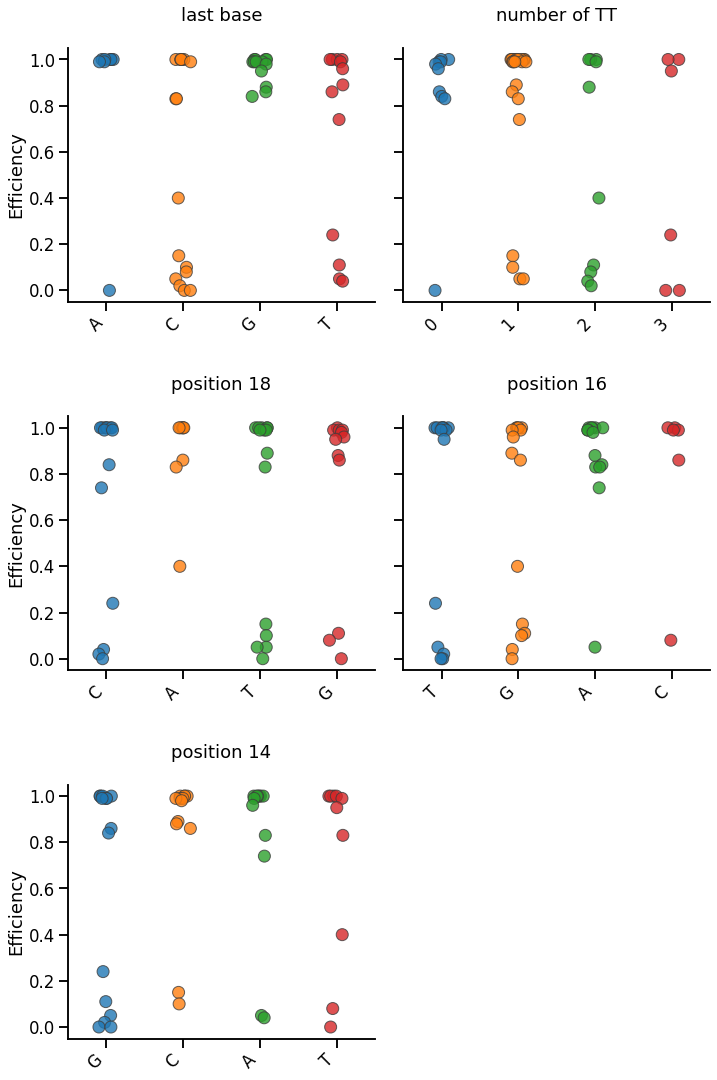

In [8]:
sns.set_context('talk')
g =sns.catplot(data = melted.loc[melted['variable'].isin(['last base', 'position 18', 'number of TT', 'position 14', 'position 16'])]  , 
            x = 'value', y = 'Efficiency', col = 'variable',
            kind = 'strip', col_wrap=2, sharex=False, s = 12,alpha = 0.8, linewidth = 1)

g.set_titles(template='{col_name}\n')

g.fig.subplots_adjust(hspace=0.45)

for i in g.axes.flat:
    plt.setp(i.get_xticklabels(), rotation=45, ha = 'right')
    i.set(xlabel = None)



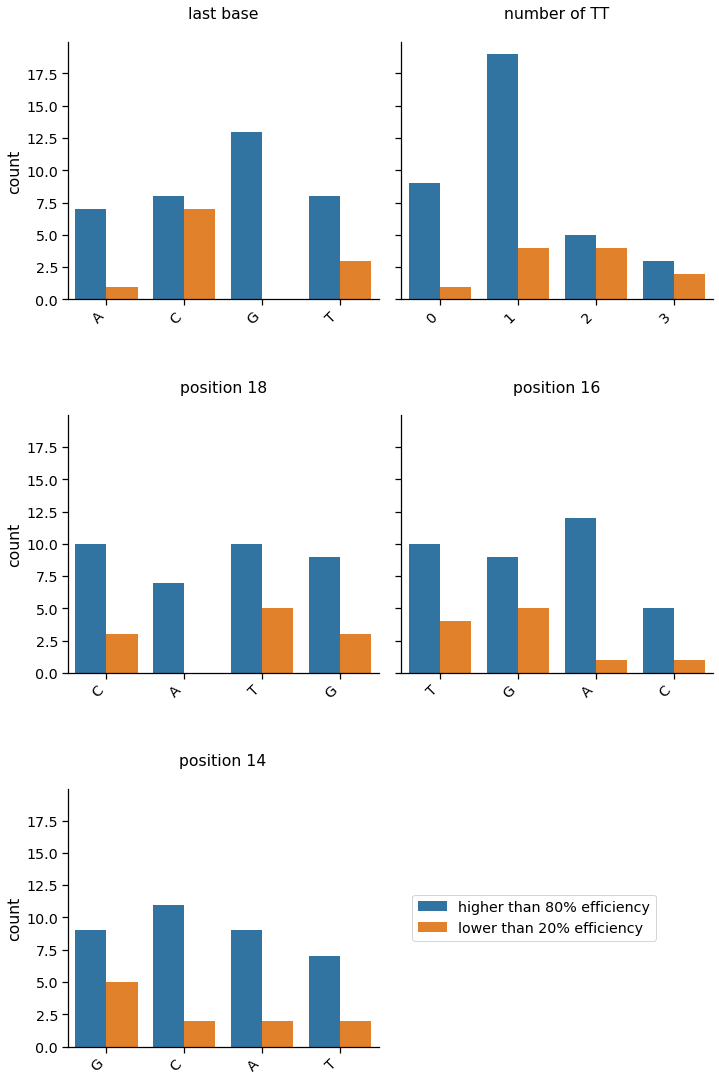

In [9]:
#Best vs Worst count
melted['Cat'] = 'a'
melted.loc[melted['Efficiency'] >=0.8 , 'Cat'] = 'higher than 80% efficiency'
melted.loc[melted['Efficiency'] <0.2 , 'Cat'] = 'lower than 20% efficiency'
melted = melted.loc[melted['Cat'] != 'a']

sns.set_context('notebook', font_scale=1.3)
g =sns.catplot(data = melted.loc[melted['variable'].isin(['last base', 
                                                          'number of TT', 'position 14', 'position 16','position 18'])]  , 
            x = 'value', col = 'variable', hue = 'Cat',
            kind = 'count', sharex=False, col_wrap= 2, legend = False)

g.set_titles(template='{col_name}\n')
g.fig.subplots_adjust(hspace=0.45)
plt.legend(loc= 'center', bbox_to_anchor=(1.5, 0.5))


for i in g.axes.flat:
    plt.setp(i.get_xticklabels(), rotation=45, ha = 'right')
    i.set(xlabel = None)
    

In [10]:
#Best vs worst
BvW = df_correlation.loc[(df_correlation['Efficiency'] > 0.9) | (df_correlation['Efficiency'] < 0.25) ]
BvW.loc[BvW['Efficiency'] >0.9 , 'Category'] = 'Best'
BvW.loc[BvW['Efficiency'] <0.25 , 'Category'] = 'Worst'
BvW

/Users/vasdam/ml/my_env/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/vasdam/ml/my_env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/vasdam/ml/my_env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Sequence,Efficiency,GC content,last base,number of TT,number of G,Tm 16to20,position 18,position 16,position 14,Category
0,CTAATGTGTCCGCGTTTCTA,1.00,45.0,A,1,4,12.0,C,T,G,Best
1,CGCCATTCAAGAGCAGCAAC,1.00,55.0,C,1,4,16.0,A,G,C,Best
2,GCAATGCGATGTTAGTTTAG,1.00,40.0,G,2,6,12.0,T,T,A,Best
3,GTTGACCAGTTGATCAGTTG,1.00,45.0,G,3,6,14.0,T,A,T,Best
4,ATATGTCTCTAATTTTGGAA,1.00,25.0,A,2,3,14.0,G,T,T,Best
5,TGAGAATACTGTTGTAAAAC,1.00,30.0,C,1,4,12.0,A,A,G,Best
6,TGAAACTCTAATCCTACTAT,1.00,30.0,T,0,1,12.0,T,A,C,Best
7,GCTTCAAGAATTGAGTAAAC,1.00,35.0,C,2,4,12.0,A,T,A,Best
8,TTGTCACAGTGTCACATCAG,1.00,45.0,G,1,4,14.0,C,A,A,Best
9,GGGTCGTGATTAAGCCTCTA,1.00,50.0,A,1,6,14.0,C,C,G,Best


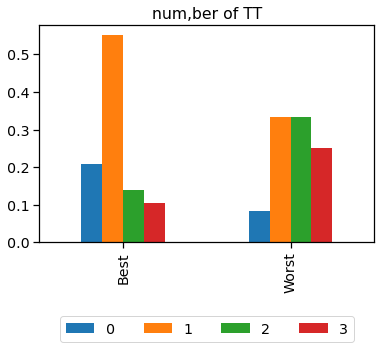

In [11]:
#Instead of number of TT write the category you are interested
BvW.groupby(['Category'])['number of TT'].value_counts(normalize = True).unstack().plot(kind = 'bar') 
plt.legend(loc = 'center', bbox_to_anchor=(0.5, -.4), ncol=len(BvW['number of TT'].unique()))
plt.xlabel('')
plt.title('num,ber of TT')

plt.show()


In [12]:
# Correlation matrix
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
encoded_df = df_correlation.copy()

#Encode the last base
encoder = LabelBinarizer()
encoder.fit(encoded_df['last base'])
transformed = encoder.transform(encoded_df['last base'])
binar = pd.DataFrame(transformed)
binar.columns = ['last A', 'Last C', 'Last G', 'Last T']
encoded_df = pd.concat([encoded_df, binar], axis=1).drop(['last base'], axis=1)

In [13]:
#encode position 18
encoder = LabelBinarizer()
encoder.fit(encoded_df['position 18'])
transformed = encoder.transform(encoded_df['position 18'])
binar = pd.DataFrame(transformed)
binar.columns = ['A 18', 'C 18', 'G 18', 'T 18']
encoded_df = pd.concat([encoded_df, binar], axis=1).drop(['position 18'], axis=1)

In [14]:
#encode position 16
encoder = LabelBinarizer()
encoder.fit(encoded_df['position 16'])
transformed = encoder.transform(encoded_df['position 16'])
binar = pd.DataFrame(transformed)
binar.columns = ['A 16', 'C 16', 'G 16', 'T 16']
encoded_df = pd.concat([encoded_df, binar], axis=1).drop(['position 16'], axis=1)

In [15]:
#encode position 14
encoder = LabelBinarizer()
encoder.fit(encoded_df['position 14'])
transformed = encoder.transform(encoded_df['position 14'])
binar = pd.DataFrame(transformed)
binar.columns = ['A 14', 'C 14', 'G 14', 'T 14']
encoded_df = pd.concat([encoded_df, binar], axis=1).drop(['position 14'], axis=1)

In [16]:
encoded_df.head(3)

,Sequence,Efficiency,GC content,number of TT,number of G,Tm 16to20,last A,Last C,Last G,Last T,...,G 18,T 18,A 16,C 16,G 16,T 16,A 14,C 14,G 14,T 14
0,CTAATGTGTCCGCGTTTCTA,1.0,45.0,1,4,12.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,CGCCATTCAAGAGCAGCAAC,1.0,55.0,1,4,16.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,GCAATGCGATGTTAGTTTAG,1.0,40.0,2,6,12.0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [17]:
correlation = encoded_df.corr()
correlation['Efficiency'].sort_values(ascending = False)

Efficiency      1.000000
Last G          0.341754
A 16            0.210342
A 18            0.169512
last A          0.154041
C 14            0.148965
A 14            0.094510
C 16            0.080353
G 18           -0.004491
T 14           -0.013664
C 18           -0.019579
number of G    -0.046473
Last T         -0.080266
T 16           -0.089341
GC content     -0.092281
T 18           -0.111845
Tm 16to20      -0.138191
G 16           -0.173732
G 14           -0.218740
number of TT   -0.305743
Last C         -0.366942
Name: Efficiency, dtype: float64

In [18]:
c_eff = pd.DataFrame(correlation['Efficiency'])
c_eff.columns = ['correlation']
c_eff.drop('Efficiency', axis= 0, inplace= True)
c_eff['category'] = c_eff.index


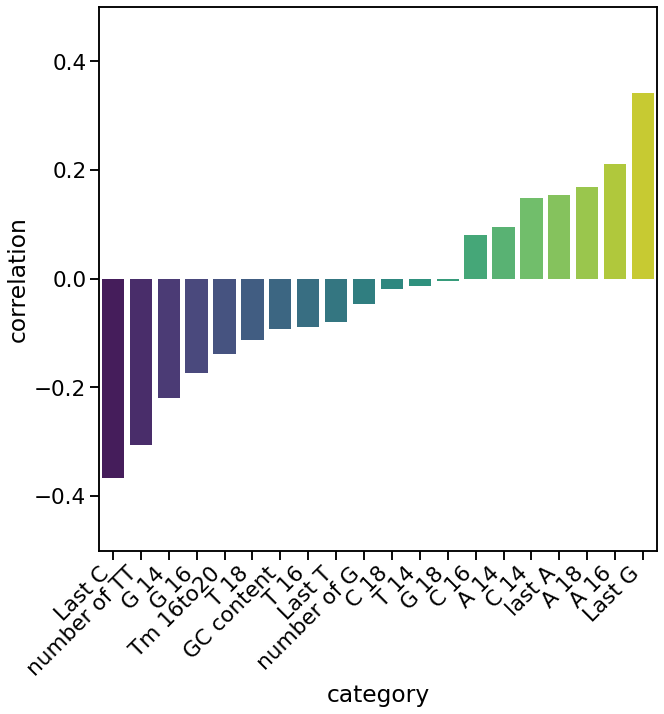

In [19]:
sns.set_context('talk', font_scale=1.3)
plt.figure(figsize= (10, 10))
g = sns.barplot(data=c_eff, x = c_eff.category, y = c_eff.correlation, 
                order = c_eff.sort_values('correlation').category, palette = 'viridis')

g.set(ylim = (-0.5, 0.5))
plt.setp(g.get_xticklabels(), rotation=45, ha = 'right')
plt.show()